# Assignment 1: Uninformed Search

Yashad Samant

## Overview

This assignment is based on two uninformed search methods - Breadth Search Algorithm and Depth Search Algorithm. We are going to evaluate the time response of each algorithm and their ability to search the optimal path. As these are uninformed searches, we don't have any data about the goal.  

## Required Code

In this assignment, we have defined two functions one designated to breadth first search and the other one to depth first search. They both take startState, goalState and successorsf as inputs and returns the path from start state to the goal. Both the search algorithms involve similar search pattern except breadth search algorithm is gives optimal results consuming more time but less memory while depth search algorithm results are not as good as the previous method but it consumes less time due to its direct approach. 

For this assignment, we have implemented.
* breadthFirstSearch(startState, goalState, successorsf)
* depthFirstSearch(startState, goalState, successorsf)

We have tested these functions on two different examples-:
* letter puzzle
* grid puzzle

### MAIN

In [21]:
#Importing necessarylibraries

import copy
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# function to generate children states

def successorsf(state):
    return copy.copy(successors.get(state, []))

In [23]:
## ALGORITHM
# Initialize the necessary variables.
# generate a while loop to run until elements in unexpanded
# Pop the state from unexpanded and find its children using successorsf
# check if goal in children
# check if the children are already present expanded and unexpanded, if yes, toss them.
# append the new entries in temporary unexpanded and concatenate to unexpanded in particular order depending on the algorithm.
# Generate a infinite loop for path which checks for goals in expanded dictionary and iterate through it until you find None.
# append the path, reverse and return it through the function

def breadthFirstSearch(startState, goalState, successorsf):
    unexpanded = [(startState, None)]
    expanded = {}
    state = []
    path = []
    
    while unexpanded:
            popped = unexpanded.pop() 
            state=popped[0]
            children_list = successorsf(popped[0]) 
            expanded[state] = popped[1]
            if state == goalState:
                break
            unexpanded_tmp = []
            for child in children_list:
                check = 0
                if child in unexpanded:
                    check = 1
                if child in expanded:
                    check = 1
                if check != 1:
                    unexpanded_tmp.append((child, popped[0]))
            unexpanded = unexpanded_tmp + unexpanded
    print("_______________________________________________________________________________________________________________")
    print ("Unexpanded :", unexpanded)
    print ("Expanded :", expanded)
    v = goalState
    path.append(v)
    while(1):
        value= expanded.get(v)
        if value != None:
            path.append(value)
            v = value
        else:
            break
    path.reverse()  
    return path 

In [24]:
## ALGORITHM
# Initialize the necessary variables.
# generate a while loop to run until elements in unexpanded
# Pop the state from unexpanded and find its children using successorsf
# check if goal in children
# reverse the children list
# check if the children are already present expanded and unexpanded, if yes, toss them.
# append the new entries in temporary unexpanded and concatenate to unexpanded in particular order depending on the algorithm.
# Generate a infinite loop for path which checks for goals in expanded dictionary and iterate through it until you find None.
# append the path, reverse and return it through the function

def depthFirstSearch(startState, goalState, successorsf):
    unexpanded = [(startState, None)]
    expanded = {}
    state = []
    path = []
    while unexpanded:
            popped = unexpanded.pop() 
            state=popped[0]
            children_list = successorsf(popped[0]) 
            expanded[state] = popped[1]
            print ('state', state)
            print (goalState)
            if state == goalState:
                break
            children_list.reverse()
            unexpanded_tmp = []
            for child in children_list:
                check = 0
                for i in unexpanded:
                    if child in i:
                        check = 1
                for i in expanded:
                    if child in expanded:
                        check = 1
                if check != 1:
                    unexpanded_tmp.append((child, popped[0]))
            unexpanded = unexpanded + unexpanded_tmp
    print("____________________________________________________________________________________________________________")
    print ("Unexpanded :", unexpanded)
    print ("Expanded :", expanded)
    v = goalState
    path.append(v)
    while(1):
        value= expanded.get(v)
        if value != None:
            path.append(value)
            v = value
        else:
            break
    path.reverse()  
    return path

### Problem 1 - Letter puzzle

In [28]:
# Generating the problem

successors = {'a':  ['b', 'c', 'd'],
              'b':  ['e', 'f', 'g'],
              'c':  [ 'a', 'h', 'i'],
              'd':  ['j', 'z'],
              'e':  ['k', 'l'],
              'g':  ['m'],
              'k':  ['z']}
successors

{'a': ['b', 'c', 'd'],
 'b': ['e', 'f', 'g'],
 'c': ['a', 'h', 'i'],
 'd': ['j', 'z'],
 'e': ['k', 'l'],
 'g': ['m'],
 'k': ['z']}

In [31]:
print('Breadth-first')
print('path from a to a is', breadthFirstSearch('a', 'a', successorsf))
print("____________________________________________________________________________________________________________")
print('path from a to m is', breadthFirstSearch('a', 'm', successorsf))
print("____________________________________________________________________________________________________________")
print('path from a to z is', breadthFirstSearch('a', 'z', successorsf))
print("____________________________________________________________________________________________________________")

Breadth-first
_______________________________________________________________________________________________________________
Unexpanded : []
Expanded : {'a': None}
path from a to a is ['a']
____________________________________________________________________________________________________________
_______________________________________________________________________________________________________________
Unexpanded : [('k', 'e'), ('l', 'e')]
Expanded : {'f': 'b', 'z': 'd', 'j': 'd', 'i': 'c', 'd': 'a', 'b': 'a', 'm': 'g', 'c': 'a', 'h': 'c', 'e': 'b', 'g': 'b', 'a': None}
path from a to m is ['a', 'b', 'g', 'm']
____________________________________________________________________________________________________________
_______________________________________________________________________________________________________________
Unexpanded : [('e', 'b'), ('f', 'b'), ('g', 'b'), ('h', 'c'), ('i', 'c'), ('j', 'd')]
Expanded : {'c': 'a', 'd': 'a', 'b': 'a', 'z': 'd', 'a': None}
path f

In [32]:
print('Depth-first')
print('path from a to a is', depthFirstSearch('a', 'a', successorsf))
print("____________________________________________________________________________________________________________")
print('path from a to m is', depthFirstSearch('a', 'm', successorsf))
print("____________________________________________________________________________________________________________")
print('path from a to z is', depthFirstSearch('a', 'z', successorsf))
print("____________________________________________________________________________________________________________")

Depth-first
state a
a
____________________________________________________________________________________________________________
Unexpanded : []
Expanded : {'a': None}
path from a to a is ['a']
____________________________________________________________________________________________________________
state a
m
state b
m
state e
m
state k
m
state z
m
state l
m
state f
m
state g
m
state m
m
____________________________________________________________________________________________________________
Unexpanded : [('d', 'a'), ('c', 'a')]
Expanded : {'k': 'e', 'b': 'a', 'm': 'g', 'z': 'k', 'f': 'b', 'l': 'e', 'e': 'b', 'g': 'b', 'a': None}
path from a to m is ['a', 'b', 'g', 'm']
____________________________________________________________________________________________________________
state a
z
state b
z
state e
z
state k
z
state z
z
____________________________________________________________________________________________________________
Unexpanded : [('d', 'a'), ('c', 'a'), ('g', 'b

### Proble 2 - Grid Puzzle
Let's try a navigation problem around a grid of size 10 x 10.

In [33]:
def gridSuccessors(state):
    row, col = state
    # succs will be list of tuples () rather than list of lists [] because state must
    # be an immutable type to serve as a key in dictionary of expanded nodes
    succs = []
    for r in [-1, 0, 1]:
        for c in [-1, 0, 1]:
            newr = row + r
            newc = col + c
            if 0 <= newr <= 9 and 0 <= newc <= 9:  # cool, huh?
                succs.append( (newr, newc) )
    return succs

In [34]:
gridSuccessors([3,4])

[(2, 3), (2, 4), (2, 5), (3, 3), (3, 4), (3, 5), (4, 3), (4, 4), (4, 5)]

In [35]:
gridSuccessors([3,9])

[(2, 8), (2, 9), (3, 8), (3, 9), (4, 8), (4, 9)]

In [36]:
gridSuccessors([0,0])

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [37]:
print('Breadth-first')
print('path from (0, 0) to (9, 9) is', breadthFirstSearch((0, 0), (9, 9), gridSuccessors))
print("____________________________________________________________________________________________________________")

Breadth-first
_______________________________________________________________________________________________________________
Unexpanded : [((0, 9), (0, 8)), ((1, 9), (0, 8)), ((0, 9), (1, 8)), ((1, 9), (1, 8)), ((2, 9), (1, 8)), ((0, 9), (0, 8)), ((1, 9), (0, 8)), ((0, 9), (1, 8)), ((1, 9), (1, 8)), ((2, 9), (1, 8)), ((1, 9), (2, 8)), ((2, 9), (2, 8)), ((3, 9), (2, 8)), ((0, 9), (0, 8)), ((1, 9), (0, 8)), ((0, 9), (1, 8)), ((1, 9), (1, 8)), ((2, 9), (1, 8)), ((0, 9), (0, 8)), ((1, 9), (0, 8)), ((0, 9), (1, 8)), ((1, 9), (1, 8)), ((2, 9), (1, 8)), ((1, 9), (2, 8)), ((2, 9), (2, 8)), ((3, 9), (2, 8)), ((0, 9), (1, 8)), ((1, 9), (1, 8)), ((2, 9), (1, 8)), ((1, 9), (2, 8)), ((2, 9), (2, 8)), ((3, 9), (2, 8)), ((2, 9), (3, 8)), ((3, 9), (3, 8)), ((4, 9), (3, 8)), ((0, 9), (0, 8)), ((1, 9), (0, 8)), ((0, 9), (1, 8)), ((1, 9), (1, 8)), ((2, 9), (1, 8)), ((0, 9), (0, 8)), ((1, 9), (0, 8)), ((0, 9), (1, 8)), ((1, 9), (1, 8)), ((2, 9), (1, 8)), ((1, 9), (2, 8)), ((2, 9), (2, 8)), ((3, 9), (2, 8

In [38]:
print('Depth-first')
print('path from (0, 0) to (9, 9) is', depthFirstSearch((0, 0), (9, 9), gridSuccessors))
print("____________________________________________________________________________________________________________")

Depth-first
state (0, 0)
(9, 9)
state (0, 1)
(9, 9)
state (0, 2)
(9, 9)
state (0, 3)
(9, 9)
state (0, 4)
(9, 9)
state (0, 5)
(9, 9)
state (0, 6)
(9, 9)
state (0, 7)
(9, 9)
state (0, 8)
(9, 9)
state (0, 9)
(9, 9)
state (1, 9)
(9, 9)
state (2, 8)
(9, 9)
state (2, 7)
(9, 9)
state (2, 6)
(9, 9)
state (2, 5)
(9, 9)
state (2, 4)
(9, 9)
state (2, 3)
(9, 9)
state (2, 2)
(9, 9)
state (2, 1)
(9, 9)
state (2, 0)
(9, 9)
state (3, 0)
(9, 9)
state (4, 0)
(9, 9)
state (5, 0)
(9, 9)
state (6, 0)
(9, 9)
state (7, 0)
(9, 9)
state (8, 0)
(9, 9)
state (9, 0)
(9, 9)
state (9, 1)
(9, 9)
state (8, 2)
(9, 9)
state (7, 2)
(9, 9)
state (6, 2)
(9, 9)
state (5, 2)
(9, 9)
state (4, 2)
(9, 9)
state (4, 3)
(9, 9)
state (4, 4)
(9, 9)
state (4, 5)
(9, 9)
state (4, 6)
(9, 9)
state (4, 7)
(9, 9)
state (4, 8)
(9, 9)
state (4, 9)
(9, 9)
state (5, 9)
(9, 9)
state (6, 8)
(9, 9)
state (6, 7)
(9, 9)
state (6, 6)
(9, 9)
state (6, 5)
(9, 9)
state (6, 4)
(9, 9)
state (7, 4)
(9, 9)
state (8, 4)
(9, 9)
state (9, 4)
(9, 9)
state (9

In [40]:
path = depthFirstSearch((0, 0), (9, 9), gridSuccessors)
print("____________________________________________________________________________________________________________")
path

state (0, 0)
(9, 9)
state (0, 1)
(9, 9)
state (0, 2)
(9, 9)
state (0, 3)
(9, 9)
state (0, 4)
(9, 9)
state (0, 5)
(9, 9)
state (0, 6)
(9, 9)
state (0, 7)
(9, 9)
state (0, 8)
(9, 9)
state (0, 9)
(9, 9)
state (1, 9)
(9, 9)
state (2, 8)
(9, 9)
state (2, 7)
(9, 9)
state (2, 6)
(9, 9)
state (2, 5)
(9, 9)
state (2, 4)
(9, 9)
state (2, 3)
(9, 9)
state (2, 2)
(9, 9)
state (2, 1)
(9, 9)
state (2, 0)
(9, 9)
state (3, 0)
(9, 9)
state (4, 0)
(9, 9)
state (5, 0)
(9, 9)
state (6, 0)
(9, 9)
state (7, 0)
(9, 9)
state (8, 0)
(9, 9)
state (9, 0)
(9, 9)
state (9, 1)
(9, 9)
state (8, 2)
(9, 9)
state (7, 2)
(9, 9)
state (6, 2)
(9, 9)
state (5, 2)
(9, 9)
state (4, 2)
(9, 9)
state (4, 3)
(9, 9)
state (4, 4)
(9, 9)
state (4, 5)
(9, 9)
state (4, 6)
(9, 9)
state (4, 7)
(9, 9)
state (4, 8)
(9, 9)
state (4, 9)
(9, 9)
state (5, 9)
(9, 9)
state (6, 8)
(9, 9)
state (6, 7)
(9, 9)
state (6, 6)
(9, 9)
state (6, 5)
(9, 9)
state (6, 4)
(9, 9)
state (7, 4)
(9, 9)
state (8, 4)
(9, 9)
state (9, 4)
(9, 9)
state (9, 5)
(9, 9)


[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (1, 9),
 (2, 8),
 (2, 7),
 (2, 6),
 (2, 5),
 (2, 4),
 (2, 3),
 (2, 2),
 (2, 1),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 1),
 (8, 2),
 (7, 2),
 (6, 2),
 (5, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (5, 9),
 (6, 8),
 (6, 7),
 (6, 6),
 (6, 5),
 (7, 4),
 (8, 4),
 (9, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (9, 9)]

In [39]:
rows = [location[0] for location in path]
cols = [location[1] for location in path]
plt.plot(rows,cols,'o-');

NameError: name 'path' is not defined

In [41]:
path = breadthFirstSearch((0, 0), (9, 9), gridSuccessors)
print("____________________________________________________________________________________________________________")
path

_______________________________________________________________________________________________________________
Unexpanded : [((0, 9), (0, 8)), ((1, 9), (0, 8)), ((0, 9), (1, 8)), ((1, 9), (1, 8)), ((2, 9), (1, 8)), ((0, 9), (0, 8)), ((1, 9), (0, 8)), ((0, 9), (1, 8)), ((1, 9), (1, 8)), ((2, 9), (1, 8)), ((1, 9), (2, 8)), ((2, 9), (2, 8)), ((3, 9), (2, 8)), ((0, 9), (0, 8)), ((1, 9), (0, 8)), ((0, 9), (1, 8)), ((1, 9), (1, 8)), ((2, 9), (1, 8)), ((0, 9), (0, 8)), ((1, 9), (0, 8)), ((0, 9), (1, 8)), ((1, 9), (1, 8)), ((2, 9), (1, 8)), ((1, 9), (2, 8)), ((2, 9), (2, 8)), ((3, 9), (2, 8)), ((0, 9), (1, 8)), ((1, 9), (1, 8)), ((2, 9), (1, 8)), ((1, 9), (2, 8)), ((2, 9), (2, 8)), ((3, 9), (2, 8)), ((2, 9), (3, 8)), ((3, 9), (3, 8)), ((4, 9), (3, 8)), ((0, 9), (0, 8)), ((1, 9), (0, 8)), ((0, 9), (1, 8)), ((1, 9), (1, 8)), ((2, 9), (1, 8)), ((0, 9), (0, 8)), ((1, 9), (0, 8)), ((0, 9), (1, 8)), ((1, 9), (1, 8)), ((2, 9), (1, 8)), ((1, 9), (2, 8)), ((2, 9), (2, 8)), ((3, 9), (2, 8)), ((0, 9), (

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9)]

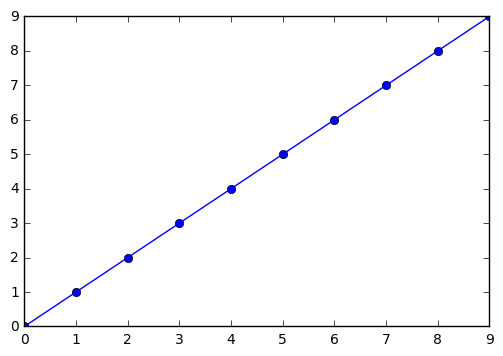

In [42]:
rows = [location[0] for location in path]
cols = [location[1] for location in path]
plt.plot(rows,cols,'o-');

## Results

**BREADTH FIRST SEARCH V/S DEPTH FIRST SEARCH** 
* When the problem is small as the first one, we didnt see much performance issues with respect to time. But in the second puzzle, it definitely took considerable time while generating the output.
* We could see the output generated while finding the path to z from a was shorter than depth first search. 
* As both problems were considerably small, we couldn't check for memory. But as we don't store anything in the unexpanded list, logically we should be able to reduce the memory usage.
* If time is a problem, more efficient algorithms can be used. We can save the whole path in unexpanded, and search in unexpanded instead of expanded. That approach is plausible but as memory is basic and prominent issue now-a-days, first approach is preferred. But, we can easily conclude that it's always a tradeo-off between memory and time.
* We can observe in the plots above, that bfs is the optimal method.

# Extra Credit

For extra credit, use your functions to solve the Camels Puzzle, described at [Logic Puzzles](http://www.folj.com/puzzles/).
The following code illustrates one possible state representation and shows results of a breadth-first and a dept-first search.  You must define a new successors function, called `camelSuccessorsf`. 

In [ ]:
camelStartState

In [ ]:
camelGoalState

In [ ]:
camelSuccessorsf(camelStartState)

In [ ]:
children = camelSuccessorsf(camelStartState)
print(children[0])
camelSuccessorsf(children[0])

In [ ]:
bfs = breadthFirstSearch(camelStartState, camelGoalState, camelSuccessorsf)
print('Breadth-first solution: (', len(bfs), 'steps)')
for s in bfs:
    print(s)

dfs = depthFirstSearch(camelStartState, camelGoalState, camelSuccessorsf)
print('Depth-first solution: (', len(dfs), 'steps)')
for s in dfs:
    print(s)

## Grading

Your notebook will be run and graded automatically. Download [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/A1grader.tar)  and extract A1grader.py from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect score of 80/100 if your functions are defined correctly. 

The remaining 20% will be based on your writing.  In markdown cells, explain what your functions are doing and summarize the algorithms.

Add at least one markdown cell that describes problems you encountered in trying to solve this assignment.

## Check-in

Do not include this section in your notebook.

Name your notebook ```Lastname-A1.ipynb```.  So, for me it would be ```Anderson-A1.ipynb```.  Submit the file using the ```Assignment 1``` link on [Canvas](https://colostate.instructure.com/courses/55296).

Grading will be based on 

  * correct behavior of the required functions, and
  * readability of the notebook.

In [18]:
%run -i A1grader.py

Searching this graph:
 {'e': ['g', 'h', 'i'], 'd': ['f', 'i'], 'a': ['b'], 'c': ['e'], 'b': ['c', 'd']}
Looking for path from a to b.
_______________________________________________________________________________________________________________
Unexpanded : []
Expanded : {'a': None, 'b': 'a'}
____________________________________________________________________________________________________________
Unexpanded : []
Expanded : {'a': None, 'b': 'a'}
20/20 points. Your breadthFirstSearch found correct solution path of ['a', 'b']
20/20 points. Your depthFirstSearch found correct solution path of ['a', 'b']
Looking for path from a to i.
_______________________________________________________________________________________________________________
Unexpanded : [('e', 'c'), ('f', 'd')]
Expanded : {'d': 'b', 'a': None, 'c': 'b', 'i': 'd', 'b': 'a'}
____________________________________________________________________________________________________________
Unexpanded : [('d', 'b')]
Expanded : 